## Installing necessary libraries

In [43]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 300)
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pointbiserialr
import pingouin as pg
import matplotlib.pyplot as plt

### Load the file preprocessed from stage 1

In [44]:
big_df=pd.read_csv("big_df.csv")

#Dropping columns which are not relevant and are not giving enough information during preprocessing 
big_df=big_df.drop(["Unnamed: 0", "Patient_Title", "DateInactive", "AdmissionDate", "Admission_dateAdded", 
                    "StartDate", "AdmissionStatusCode", "MedicareAdmission", "Patient_DocumentType", 
                    "firstAssessmentDate"],axis=1)
big_df

/tmp/ipykernel_169583/2448975765.py:1: DtypeWarning: Columns (55,56,57,58,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,127) have mixed types. Specify dtype option on import or set low_memory=False.
  big_df=pd.read_csv("big_df.csv")


,Pulse,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,...,SmokingStatusText,PatientIDWoundNumber,DebridementLevel,Method,Bleeding,IsThisBurn,SInsuranceZip,PInsuranceZip,Wound_healing_status,DayNumber
0,NaN,-1.0,1.0,33.60,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Unknown,1
1,NaN,-1.0,1.0,38.00,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Not healing,8
2,NaN,-1.0,1.0,40.28,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Not healing,15
3,NaN,-1.0,1.0,40.28,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Not healing,22
4,NaN,-1.0,1.0,30.00,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Grey,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197470,NaN,1.0,1.0,169.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Not healing,72
197471,NaN,1.0,1.0,130.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Grey,75
197472,NaN,1.0,1.0,110.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Not healing,80
197473,NaN,1.0,1.0,110.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Not healing,87


### Changing the formats of data values in some columns which are in string format, and inside of the string they are stored in list formats

In [45]:
big_df["NonWoundDiagnosis"] = big_df['NonWoundDiagnosis'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
#big_df['NonWoundDiagnosis_1'] = big_df['NonWoundDiagnosis_1'].apply(lambda x: eval(x.replace("nan", "None").replace("False", "False").replace("True", "True")))

big_df["NonWoundDiagnosis"]=big_df["NonWoundDiagnosis"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])

# Converting the values to boolean (if needed)
big_df["NonWoundDiagnosis"]=big_df["NonWoundDiagnosis"].map({'False': False, ' False': False, ' True': True, ' nan': np.nan, 'nan': np.nan})

In [46]:
big_df["PalliativeCare"] = big_df['PalliativeCare'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
#big_df['NonWoundDiagnosis_1'] = big_df['NonWoundDiagnosis_1'].apply(lambda x: eval(x.replace("nan", "None").replace("False", "False").replace("True", "True")))

big_df["PalliativeCare"]=big_df["PalliativeCare"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])

# Converting the values to boolean (if needed)
big_df["PalliativeCare"]=big_df["PalliativeCare"].map({'False': False, ' False': False, ' True': True, ' nan': np.nan, 'nan': np.nan})

big_df["PalliativeCare"].unique()

array([False, nan, True], dtype=object)

In [47]:
big_df["CauseOfDeath"] = big_df['CauseOfDeath'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
#big_df['NonWoundDiagnosis_1'] = big_df['NonWoundDiagnosis_1'].apply(lambda x: eval(x.replace("nan", "None").replace("False", "False").replace("True", "True")))

big_df["CauseOfDeath"]=big_df["CauseOfDeath"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])

# # Converting the values to boolean (if needed)
# big_df["PalliativeCare"]=big_df["PalliativeCare"].map({'False': False, ' False': False, ' True': True, ' nan': np.nan, 'nan': np.nan})
big_df["CauseOfDeath"]=big_df["CauseOfDeath"].replace(' nan', 'nan').replace(" 'Unk'", " 'unknown'")
big_df["CauseOfDeath"] = big_df["CauseOfDeath"].str.strip().str.replace("'", '')
big_df["CauseOfDeath"].unique()

array(['nan', 'Heart Failure', 'CVA', 'Cancer', 'unknown',
       'multisystem organ failure', 'Cardiopulm arrest',
       'Sepsis due to ulcerative colitis',
       'cardiopulmonary and neurologic functions had ceased',
       'Congestive Heart Failure', 'Cardiac arrest', 'COVID-19',
       'Stage 4 lung cancer', 'Respiratory related',
       'recurrent tonsillar squamous cell carcinoma with metastasis to the lungs and failure to thrive',
       'Cranial injuries due to fall', 'Septic shock'], dtype=object)

In [48]:
big_df["DateOfDeath"] = big_df['DateOfDeath'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
#big_df['NonWoundDiagnosis_1'] = big_df['NonWoundDiagnosis_1'].apply(lambda x: eval(x.replace("nan", "None").replace("False", "False").replace("True", "True")))

big_df["DateOfDeath"]=big_df["DateOfDeath"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])

# # Converting the values to boolean (if needed)
# big_df["PalliativeCare"]=big_df["PalliativeCare"].map({'False': False, ' False': False, ' True': True, ' nan': np.nan, 'nan': np.nan})
big_df["DateOfDeath"]=big_df["DateOfDeath"].replace(' nan', 'nan')
big_df["DateOfDeath"] = big_df["DateOfDeath"].str.strip().str.replace("'", '')

big_df["DateOfDeath"].unique()

array(['nan', '12/3/2022 12:00:00 AM', '8/11/2017 12:00:00 AM',
       '9/30/2017 12:00:00 AM', '12/1/2016 12:00:00 AM',
       '6/13/2018 12:00:00 AM', '10/27/2022 12:00:00 AM',
       '12/23/2016 12:00:00 AM', '5/26/2018 12:00:00 AM',
       '1/17/2020 12:00:00 AM', '8/24/2016 12:00:00 AM',
       '8/28/2017 12:00:00 AM', '2/4/2020 12:00:00 AM',
       '6/30/2017 12:00:00 AM', '6/2/2021 12:00:00 AM',
       '9/6/2016 12:00:00 AM', '10/26/2020 12:00:00 AM',
       '4/21/2020 12:00:00 AM', '5/1/2021 12:00:00 AM',
       '9/18/2017 12:00:00 AM', '3/5/2019 12:00:00 AM',
       '3/8/2020 12:00:00 AM', '11/25/2021 12:00:00 AM',
       '4/11/2018 12:00:00 AM', '5/10/2017 12:00:00 AM',
       '1/16/2022 12:00:00 AM', '12/15/2017 12:00:00 AM',
       '9/14/2017 12:00:00 AM', '4/22/2020 12:00:00 AM',
       '12/12/2019 12:00:00 AM', '8/31/2021 12:00:00 AM',
       '10/8/2018 12:00:00 AM', '6/7/2018 12:00:00 AM',
       '4/10/2017 12:00:00 AM', '5/27/2019 12:00:00 AM',
       '3/8/2018 12:00:00

In [49]:
big_df["ethnicityCdcCode"] = big_df['ethnicityCdcCode'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
#big_df['NonWoundDiagnosis_1'] = big_df['NonWoundDiagnosis_1'].apply(lambda x: eval(x.replace("nan", "None").replace("False", "False").replace("True", "True")))

big_df["ethnicityCdcCode"]=big_df["ethnicityCdcCode"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])

# # Converting the values to boolean (if needed)
# big_df["PalliativeCare"]=big_df["PalliativeCare"].map({'False': False, ' False': False, ' True': True, ' nan': np.nan, 'nan': np.nan})
big_df["ethnicityCdcCode"]=big_df["ethnicityCdcCode"].replace(' nan', 'nan')
big_df["ethnicityCdcCode"] = big_df["ethnicityCdcCode"].str.strip().str.replace("'", '')

big_df["ethnicityCdcCode"].unique()

array(['2186-5', 'nan', '2135-2', 'asku'], dtype=object)

In [50]:
big_df["patientEthnicity"] = big_df['patientEthnicity'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["patientEthnicity"]=big_df["patientEthnicity"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["patientEthnicity"]=big_df["patientEthnicity"].replace(' nan', 'nan')
big_df["patientEthnicity"] = big_df["patientEthnicity"].str.strip().str.replace("'", '')
big_df["patientEthnicity"].unique()

array(['9.0', 'nan', '10.0', '11.0'], dtype=object)

In [51]:
big_df["PatientGender"] = big_df['PatientGender'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["PatientGender"]=big_df["PatientGender"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["PatientGender"]=big_df["PatientGender"].replace(' nan', 'nan')
big_df["PatientGender"] = big_df["PatientGender"].str.strip().str.replace("'", '')
big_df["PatientGender"].unique()

array(['F', 'M', 'nan'], dtype=object)

In [52]:
big_df["PatientSelfCare"] = big_df['PatientSelfCare'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["PatientSelfCare"]=big_df["PatientSelfCare"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["PatientSelfCare"]=big_df["PatientSelfCare"].replace(' nan', 'nan')
big_df["PatientSelfCare"] = big_df["PatientSelfCare"].str.strip().str.replace("'", '')
big_df["PatientSelfCare"].unique()

array(['nan', '1.0', '0.0', '-1.0'], dtype=object)

In [53]:
big_df["PatientZIP"] = big_df['PatientZIP'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["PatientZIP"]=big_df["PatientZIP"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["PatientZIP"]=big_df["PatientZIP"].replace(' nan', 'nan')
big_df["PatientZIP"] = big_df["PatientZIP"].str.strip().str.replace("'", '')
big_df["PatientZIP"] = big_df["PatientZIP"].astype(str).str.replace('\.0', '', regex=True)
big_df["PatientZIP"].unique()

array(['47909', '47429', '47421', '47446', '47971', '47404', '46202',
       '47396', '46220', '46055', '47401', '47403', '46203', '47904',
       '47960', '47452', '46229', '47265', '46074', '46616', '47432',
       '47905', '46240', '47924', '47990', '46208', '47906', '47993',
       '47932', '46241', '46218', '46228', '46184', '46158', '46065',
       '46231', '47451', '46041', '46038', '47274', '47362', '46996',
       '47408', '47424', '46151', '47470', '46219', '46222', '46260',
       '46205', '46350', '46077', '46037', '46204', '46131', '47928',
       '47923', '47454', '47933', '47940', '47970', '46239', '47448',
       '47434', '61846', '46052', '46221', '47920', '46172', '46278',
       '47468', '46254', '46013', '46058', '46176', '47918', '60540',
       '46227', '46225', '47460', '46268', '46237', '46923', '46123',
       '46917', '47436', '46217', '46960', '47459', '46201', '47462',
       '46143', '47941', '46226', '47885', '46342', '46952', '47456',
       '46173', '472

In [54]:
big_df["RaceCodeList"] = big_df['RaceCodeList'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["RaceCodeList"]=big_df["RaceCodeList"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["RaceCodeList"]=big_df["RaceCodeList"].replace(' nan', 'nan')
big_df["RaceCodeList"] = big_df["RaceCodeList"].str.strip().str.replace("'", '')
big_df["RaceCodeList"].unique()

array(['nan', '2106-3', '2054-5', '2028-9', 'asku', '1002-5', '2076-8',
       '2131-1'], dtype=object)

In [55]:
big_df["Religion"] = big_df['Religion'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["Religion"]=big_df["Religion"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["Religion"]=big_df["Religion"].replace(' nan', 'nan')
big_df["Religion"] = big_df["Religion"].str.strip().str.replace("'", '')
big_df["Religion"] = big_df["Religion"].astype(str).str.replace('\.0', '', regex=True)
big_df["Religion"].unique()

array(['77', '78', '79', '56', 'nan', '39', '13', '16', '57', '54', '32',
       '37', '1', '31', '23', '81', '35', '3', '19', '9', '73', '71',
       '27', '76', '22', '18', '15', '46', '29', '25', '5', '11', '12',
       '40', '14'], dtype=object)

In [56]:
big_df["SecondaryRaceCodeList"] = big_df['SecondaryRaceCodeList'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["SecondaryRaceCodeList"]=big_df["SecondaryRaceCodeList"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["SecondaryRaceCodeList"]=big_df["SecondaryRaceCodeList"].replace(' nan', 'nan')
big_df["SecondaryRaceCodeList"] = big_df["SecondaryRaceCodeList"].str.strip().str.replace("'", '')
big_df["SecondaryRaceCodeList"].unique()

array(['nan', '2110-5'], dtype=object)

In [57]:
big_df["DateAdded_patient"] = big_df['DateAdded_patient'].str.extract(r'\[([^\]]+)\]')  # Extracts the value within brackets
big_df["DateAdded_patient"]=big_df["DateAdded_patient"].str.split(',').apply(lambda x: pd.Series(x).mode()[0])
big_df["DateAdded_patient"]=big_df["DateAdded_patient"].replace(' nan', 'nan')
big_df["DateAdded_patient"] = big_df["DateAdded_patient"].str.strip().str.replace("'", '')
big_df["DateAdded_patient"].unique()

array(['12/15/2022 8:44:18 AM', '11/1/2022 8:49:02 AM',
       '12/1/2022 11:16:18 AM', ..., '10/24/2022 2:52:35 PM',
       '10/24/2022 10:47:30 AM', '1/11/2023 8:54:50 AM'], dtype=object)

### Change the date values format, removing the time and keeping them as only the day number from first visit/ first assessment

In [ ]:
big_df_1=pd.DataFrame()
    
unique_wounds=big_df["PatientIDWoundNumber"].unique().tolist()

for i in range(len(unique_wounds)):
#     if i>0:
#         break
    print(i)
    
    wound=unique_wounds[i]
    df_wound=big_df.query("PatientIDWoundNumber==@wound")
    # Convert 'DateAdded_woundassessment' column to datetime type
    df_wound['DateAdded_woundassessment'] = pd.to_datetime(df_wound['DateAdded_woundassessment'])
    
    # Convert the 'Date' column to datetime
    df_wound['DateAdded_woundassessment'] = pd.to_datetime(df_wound['DateAdded_woundassessment'])
    df_wound['DateAcquired'] = pd.to_datetime(df_wound['DateAcquired'])
    df_wound['DateWoundHealed'] = pd.to_datetime(df_wound['DateWoundHealed'])
    df_wound['DateAdded_wound'] = pd.to_datetime(df_wound['DateAdded_wound'])
    df_wound['DateOfDeath'] = pd.to_datetime(df_wound['DateOfDeath'])
    df_wound['DateAdded_patient'] = pd.to_datetime(df_wound['DateAdded_patient'])
    df_wound['DateOfAccident'] = pd.to_datetime(df_wound['DateOfAccident'])

    # Find the minimum date in the DataFrame
    first_date = df_wound['DateAdded_woundassessment'].min()

    # Calculate the day differences relative to the first date
    df_wound['DateAcquired'] = (df_wound['DateAcquired'] - first_date).dt.days + 1
    df_wound['DateWoundHealed'] = (df_wound['DateWoundHealed'] - first_date).dt.days + 1
    df_wound['DateAdded_wound'] = (df_wound['DateAdded_wound'] - first_date).dt.days + 1
    df_wound['DateOfDeath'] = (df_wound['DateOfDeath'] - first_date).dt.days + 1
    df_wound['DateAdded_patient'] = (df_wound['DateAdded_patient'] - first_date).dt.days + 1
    df_wound['DateOfAccident'] = (df_wound['DateOfAccident'] - first_date).dt.days + 1
    
    
    big_df_1 = pd.concat([big_df_1, df_wound], axis=0)


In [59]:
big_df_1

,Pulse,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,...,SmokingStatusText,PatientIDWoundNumber,DebridementLevel,Method,Bleeding,IsThisBurn,SInsuranceZip,PInsuranceZip,Wound_healing_status,DayNumber
0,NaN,-1.0,1.0,33.60,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Unknown,1
1,NaN,-1.0,1.0,38.00,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Not healing,8
2,NaN,-1.0,1.0,40.28,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Not healing,15
3,NaN,-1.0,1.0,40.28,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Not healing,22
4,NaN,-1.0,1.0,30.00,1.0,1.0,1.0,1.0,1.0,1.0,...,quit in 2009,10000074_1,6.0,79.0,2.0,0.0,NaN,NaN,Grey,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197470,NaN,1.0,1.0,169.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Not healing,72
197471,NaN,1.0,1.0,130.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Grey,75
197472,NaN,1.0,1.0,110.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Not healing,80
197473,NaN,1.0,1.0,110.00,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,9996014_1,NaN,9.0,2.0,0.0,NaN,53708.0,Not healing,87


In [ ]:
big_df=pd.DataFrame()
    
unique_wounds=big_df_1["PatientIDWoundNumber"].unique().tolist()

for i in range(len(unique_wounds)):
#     if i>0:
#         break
    print(i)
    
    wound=unique_wounds[i]
    df_wound=big_df_1.query("PatientIDWoundNumber==@wound")
    # Convert 'DateAdded_woundassessment' column to datetime type
    df_wound['DateAdded_woundassessment'] = pd.to_datetime(df_wound['DateAdded_woundassessment'])
    
    df_wound['PatientDOB'] = pd.to_datetime(df_wound['PatientDOB'])

    # Find the minimum date in the DataFrame
    first_date = df_wound['DateAdded_woundassessment'].min()

    # Calculate the day differences relative to the first date
    df_wound['PatientDOB'] = (df_wound['PatientDOB'] - first_date).dt.days + 1
    
    big_df = pd.concat([big_df, df_wound], axis=0)


## Check the datatype 

In [63]:
big_df.dtypes

Pulse                                           float64
AdiposeExposed                                  float64
AdiposeNecrosisExposed                          float64
area                                            float64
AtrophieBlanche                                 float64
BoneNecrosisExposed                             float64
BrawnyInduration                                float64
Callus                                          float64
CapsuleExposed                                  float64
CapsuleNecrosisExposed                          float64
color                                           float64
CompCompression                                 float64
CompDiet                                        float64
CompDressing                                    float64
CompExercise                                    float64
CompHBOVisits                                   float64
CompLimb                                        float64
CompMedication                                  

## Checking the values of each features one by one and finalizing which ones are categorical and which ones are numerical

In [64]:
for column_name in big_df_1.columns:
    unique_values = big_df_1[column_name].unique()
    print(f"{column_name}: {unique_values}")

Pulse: [nan  3.  6.  1.  5. 26.  8.  4. 27.  2.]
AdiposeExposed: [-1. nan  1.  0.]
AdiposeNecrosisExposed: [ 1. nan -1.  0.]
area: [  33.6    38.     40.28 ... 1752.35  197.22   18.04]
AtrophieBlanche: [ 1. nan -1.  0.]
BoneNecrosisExposed: [ 1. nan  0. -1.]
BrawnyInduration: [ 1. nan -1.  0.]
Callus: [ 1. nan -1.  0.]
CapsuleExposed: [ 1. nan  0. -1.]
CapsuleNecrosisExposed: [ 1. nan  0. -1.]
color: [nan  6. 12. 11.  4. 54.  5.  9. 53. 72. 75. 79.  8. 74.]
CompCompression: [nan  1.]
CompDiet: [ 1. nan]
CompDressing: [ 1. nan]
CompExercise: [ 1. nan]
CompHBOVisits: [ 1. nan]
CompLimb: [ 1. nan]
CompMedication: [ 1. nan]
CompOffLoad: [ 1. nan]
CompSmoking: [ 1. nan]
CompWoundVisits: [ 1. nan]
Crepitus: [ 1. nan  0. -1.]
Cyanosis: [ 1. nan -1.  0.]
Denuded: [ 1. nan -1.  0.]
Depth: [ 2.000000e+00  4.000000e+00  5.000000e+00  3.000000e+00           nan
  1.000000e+00  1.300000e+01  8.000000e+00  3.000000e+01  1.500000e+01
  1.000000e+01  0.000000e+00  2.000000e+01  2.300000e+01  1.800000e

patientEthnicity: ['9.0' 'nan' '10.0' '11.0']
PatientGender: ['F' 'M' 'nan']
PatientSelfCare: ['nan' '1.0' '0.0' '-1.0']
PatientZIP: ['47909' '47429' '47421' '47446' '47971' '47404' '46202' '47396' '46220'
 '46055' '47401' '47403' '46203' '47904' '47960' '47452' '46229' '47265'
 '46074' '46616' '47432' '47905' '46240' '47924' '47990' '46208' '47906'
 '47993' '47932' '46241' '46218' '46228' '46184' '46158' '46065' '46231'
 '47451' '46041' '46038' '47274' '47362' '46996' '47408' '47424' '46151'
 '47470' '46219' '46222' '46260' '46205' '46350' '46077' '46037' '46204'
 '46131' '47928' '47923' '47454' '47933' '47940' '47970' '46239' '47448'
 '47434' '61846' '46052' '46221' '47920' '46172' '46278' '47468' '46254'
 '46013' '46058' '46176' '47918' '60540' '46227' '46225' '47460' '46268'
 '46237' '46923' '46123' '46917' '47436' '46217' '46960' '47459' '46201'
 '47462' '46143' '47941' '46226' '47885' '46342' '46952' '47456' '46173'
 '47260' '47145' '46224' '46256' '47465' '46361' '47581' '47352'

## Change the datatype of the categorical values

In [68]:
categorical_features=["AdiposeExposed", "AdiposeNecrosisExposed", "AtrophieBlanche", "BoneNecrosisExposed", "BrawnyInduration",
                      "Callus", "CapsuleExposed", "CapsuleNecrosisExposed","color", "CompCompression", "CompDiet", 
                      "CompDressing", "CompExercise", "CompHBOVisits", "CompLimb", 'CompMedication', 'CompOffLoad', 
                      'CompSmoking', 'CompWoundVisits', 'Crepitus', 'Cyanosis', 'Denuded', 'DryScaly', 'Ecchymosis', 'Edema',
                      'Erythema', 'Excoriation', 'ExposedBone', 'ExposedMuscle', 'ExposedTendon', 'Fluctuance', 'Friable', 
                      'GranulatedHyperGranulated', 'GranulationQualityPale', 'GranulationQualityPink', 'GranulationQualityRed',
                      'greygran', 'Hemosiderosis', 'hypergran', 'Induration', 'lowerExtremityEdema', 'Maceration', 'Moist', 
                      'MuscleNecrosisExposed', 'NoMeasurableDepth', 'NonGranulationBiofilm', 'NonGranulationDessicated',
                      'NormalColor','NormalMoisture', 'normalTexture', 'NurseOnlyVisit', 'Odor', 'Pallor', 'pinkgran', 'Rash', 
                      'redgran', 'Rubor', 'Scarring', 'Shiny', 'sinustract', 'SloughLessThan20', 'SSAbscess', 'SSCAndSPending', 
                      'SSChangesInGranulationTissue', 'SSConfirmedLocal', 'SSConfirmedSystemic', 'SSDrainageDisproportionate', 
                      'SSDrainageThick', 'SSFever', 'SSFoulWoundOdor', 'SSIncreasedEdema', 'SSInflammationExtendingToBone', 
                      'SSMalaise', 'SSNewOnset', 'SSOther', 'SSPocketing', 'SSPoorlyDefinedErythemalBorder', 
                      'SSSignsAndSymptoms', 'SSSystemicAntibiotics', 'SSTopicalAntibiotics', 
                      'SSWarmthExtendingBeyondLocalPeriWound', 'SSWoundStalling', 'SSXRay', 'surroundingSkin', 
                      'surroundingSkinColor', 'SystematicInfection', 'TendonNecrosisExposed', 'tunneling', 
                      'TunnelingOrUndermining', 'ErythemaLocCircumferential', 'NecroticTypeBlackEschar', 'JointNecrosisExposed', 
                      'TendernessOnPalpation', 'Bogginess', 'ExposedJoint', 'NecroticTypeWetHydrated', 'DryEscharFluctance', 
                      'GranulationQualityHypertrophic', 'GranulationTexture', 'NecroticTypeYellowSlough', 'AccidentType', 
                      'acquiredAtFacility', 'ActiveWound', 'Anterior_Posterior', 'Anterior_Dorsal', 'ClusteredWound', 
                      'Inferior_Superior', 'Left_Right', 'Location', 'PendingAmputationOnPresentation', 'Proximal_Distal', 
                      'ResolvedRecurrence', 'ResultOfAccident', 'Type', 'WoundCondition', 'WoundRecurrence', 'WoundLocation', 
                      'NonWoundDiagnosis', 'PalliativeCare', 'CauseOfDeath', 'ethnicityCdcCode', 'patientEthnicity', 
                      'PatientGender', 'PatientSelfCare', "PatientZIP", "RaceCodeList", 'Religion', 'SecondaryRaceCodeList', 
                      'Patient_RiskLevel', 'SmokingStatus', 'SmokingStatusText', 'Method', "IsThisBurn", "SInsuranceZip", 
                      "PInsuranceZip", "Wound_healing_status"]


# Iterate over columns
for col in big_df.columns:
    for prefix in categorical_features:
        if col.startswith(prefix) or col == prefix:
            big_df[col] = big_df[col].astype('category')

# Verify the changes
print(big_df.dtypes)

Pulse                                           float64
AdiposeExposed                                 category
AdiposeNecrosisExposed                         category
area                                            float64
AtrophieBlanche                                category
BoneNecrosisExposed                            category
BrawnyInduration                               category
Callus                                         category
CapsuleExposed                                 category
CapsuleNecrosisExposed                         category
color                                          category
CompCompression                                category
CompDiet                                       category
CompDressing                                   category
CompExercise                                   category
CompHBOVisits                                  category
CompLimb                                       category
CompMedication                                 c

In [73]:
big_df=big_df.drop(["DateAdded_woundassessment"], axis=1)

## Check the data distribution of numerical variables

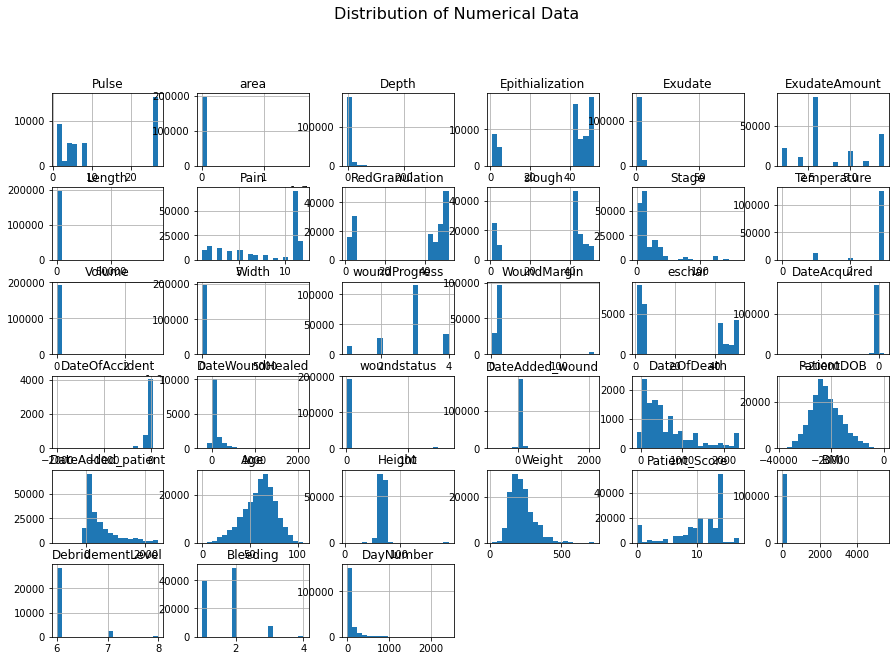

In [74]:
target_column = 'Wound_healing_status'

# Split the data into features (X) and the target variable (y)
X = big_df.drop([target_column], axis=1)

# Assuming X is your DataFrame with numerical columns
numerical_columns = X.select_dtypes(exclude=['category']).columns

# Plot histograms for each numerical column
X[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Data', y=1, fontsize=16)
plt.show()

## BMI column in this dataframe has outliers. Fixing it..

In [75]:
big_df.loc[big_df['BMI'] >= 1000, 'BMI'] /= 100
big_df["BMI"].sort_values(ascending=False).head(5000)

113973    95.1
113972    95.1
113968    95.1
113969    95.1
113970    95.1
          ... 
20821     57.2
20786     57.2
20787     57.2
20788     57.2
20734     57.2
Name: BMI, Length: 5000, dtype: float64

## measurement columns in this dataframe have outliers. Fixing it..

#### Removing the outlier rows where volumn, area, length, width, depth are of really high values

In [76]:
# Function to remove outliers using IQR method for multiple columns
def remove_outliers_iqr_multi(df, columns):
    df_filtered = df.copy()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Remove rows with values outside the bounds for the current column
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

In [78]:
# Specify the columns for outlier removal
columns_to_remove_outliers = ['Volume', 'area', 'Length', 'Width', "Depth"]

# Apply the function to remove outliers from specified columns
df_no_outliers = remove_outliers_iqr_multi(big_df, columns_to_remove_outliers)

df_no_outliers["Length"]=abs(df_no_outliers["Length"])
df_no_outliers["Depth"]=abs(df_no_outliers["Depth"])

In [79]:
big_df=df_no_outliers

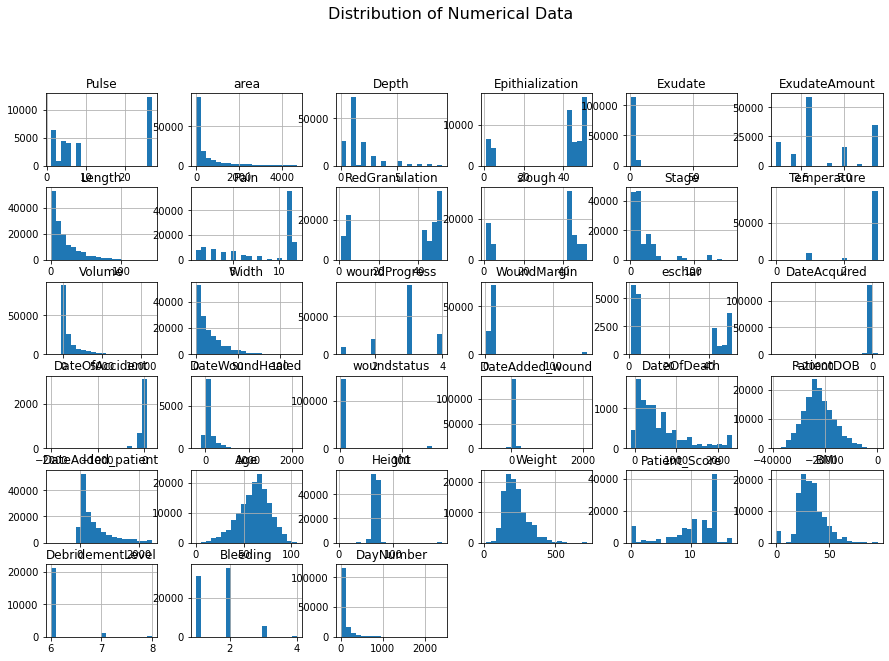

In [80]:
target_column = 'Wound_healing_status'

# Split the data into features (X) and the target variable (y)
X = big_df.drop([target_column], axis=1)

# Assuming X is your DataFrame with numerical columns
numerical_columns = X.select_dtypes(exclude=['category']).columns

# Plot histograms for each numerical column
X[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Data', y=1, fontsize=16)
plt.show()

In [85]:
# Assuming df is your DataFrame
numerical_columns = big_df.select_dtypes(include=['int8', 'float64']).columns

for column in numerical_columns:
    unique_values = big_df[column].unique()
    print(f"Unique values for Feature {column}:\n{unique_values}\n")

Unique values for Feature Pulse:
[nan  3.  6.  1.  5. 26.  8.  4. 27.  2.]

Unique values for Feature area:
[  33.6    38.     40.28 ... 1752.35  197.22   18.04]

Unique values for Feature Depth:
[2.         4.         5.         3.         1.         8.
 0.         2.5        9.         7.         6.         0.8
 0.09999999 1.5        0.2        0.01       2.2        8.5
 3.5        4.5        1.4        0.3        4.45       0.5
 1.2        7.5        0.6        1.1        3.3        0.4
 2.8        2.1        1.3        6.5        2.3        0.9       ]

Unique values for Feature Epithialization:
[nan  3.  2.  5. 44. 51. 52. 45. 47. 43. 49.  4.  1. 48. 46. 50.]

Unique values for Feature Exudate:
[nan  2.  1.  8.  4.  6.  7.  3.  9.  5. 81.]

Unique values for Feature ExudateAmount:
[ 1.  5. nan  3.  2.  6.  7.  4.]

Unique values for Feature Length:
[  5.7    9.4    7.6  ... 131.3  127.3   70.61]

Unique values for Feature Pain:
[11. nan  3.  2.  7.  1.  5.  4.  9.  6.  8. 12. 10.]

## Label encoding the categorical variables

In [86]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in big_df.columns:
    # Check if the column is of object or categorical type
    if big_df[column].dtype == 'category':
        print(column)
        # Fit and transform the categorical column
        big_df[column] = label_encoder.fit_transform(big_df[column])

AdiposeExposed
AdiposeNecrosisExposed
AtrophieBlanche
BoneNecrosisExposed
BrawnyInduration
Callus
CapsuleExposed
CapsuleNecrosisExposed
color
CompCompression
CompDiet
CompDressing
CompExercise
CompHBOVisits
CompLimb
CompMedication
CompOffLoad
CompSmoking
CompWoundVisits
Crepitus
Cyanosis
Denuded
DryScaly
Ecchymosis
Edema
Erythema
Excoriation
ExposedBone
ExposedMuscle
ExposedTendon
Fluctuance
Friable
GranulatedHyperGranulated
GranulationQualityPale
GranulationQualityPink
GranulationQualityRed
greygran
Hemosiderosis
hypergran
Induration
lowerExtremityEdema
Maceration
Moist
MuscleNecrosisExposed
NoMeasurableDepth
NonGranulationBiofilm
NonGranulationDessicated
NormalColor
NormalMoisture
normalTexture
NurseOnlyVisit
Odor
Pallor
pinkgran
Rash
redgran
Rubor
Scarring
Shiny
sinustract
SloughLessThan20
SSAbscess
SSCAndSPending
SSChangesInGranulationTissue
SSConfirmedLocal
SSConfirmedSystemic
SSDrainageDisproportionate
SSDrainageThick
SSFever
SSFoulWoundOdor
SSIncreasedEdema
SSInflammationExtendi

In [87]:
big_df.to_csv("big_df_1.csv")

In [89]:
big_df=pd.read_csv("big_df_1.csv")
big_df=big_df.drop(["Unnamed: 0"],axis=1)
big_df

,Pulse,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,...,SmokingStatusText,PatientIDWoundNumber,DebridementLevel,Method,Bleeding,IsThisBurn,SInsuranceZip,PInsuranceZip,Wound_healing_status,DayNumber
0,NaN,0,2,33.60,2,2,2,2,2,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,4,1
1,NaN,0,2,38.00,2,2,2,2,2,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,8
2,NaN,0,2,40.28,2,2,2,2,2,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,15
3,NaN,0,2,40.28,2,2,2,2,2,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,22
4,NaN,0,2,30.00,2,2,2,2,2,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150233,NaN,2,2,169.00,2,2,2,2,2,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,72
150234,NaN,2,2,130.00,2,2,2,2,2,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,0,75
150235,NaN,2,2,110.00,2,2,2,2,2,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,80
150236,NaN,2,2,110.00,2,2,2,2,2,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,87


In [95]:
categorical_features=["AdiposeExposed", "AdiposeNecrosisExposed", "AtrophieBlanche", "BoneNecrosisExposed", "BrawnyInduration",
                      "Callus", "CapsuleExposed", "CapsuleNecrosisExposed","color", "CompCompression", "CompDiet", 
                      "CompDressing", "CompExercise", "CompHBOVisits", "CompLimb", 'CompMedication', 'CompOffLoad', 
                      'CompSmoking', 'CompWoundVisits', 'Crepitus', 'Cyanosis', 'Denuded', 'DryScaly', 'Ecchymosis', 'Edema',
                      'Erythema', 'Excoriation', 'ExposedBone', 'ExposedMuscle', 'ExposedTendon', 'Fluctuance', 'Friable', 
                      'GranulatedHyperGranulated', 'GranulationQualityPale', 'GranulationQualityPink', 'GranulationQualityRed',
                      'greygran', 'Hemosiderosis', 'hypergran', 'Induration', 'lowerExtremityEdema', 'Maceration', 'Moist', 
                      'MuscleNecrosisExposed', 'NoMeasurableDepth', 'NonGranulationBiofilm', 'NonGranulationDessicated',
                      'NormalColor','NormalMoisture', 'normalTexture', 'NurseOnlyVisit', 'Odor', 'Pallor', 'pinkgran', 'Rash', 
                      'redgran', 'Rubor', 'Scarring', 'Shiny', 'sinustract', 'SloughLessThan20', 'SSAbscess', 'SSCAndSPending', 
                      'SSChangesInGranulationTissue', 'SSConfirmedLocal', 'SSConfirmedSystemic', 'SSDrainageDisproportionate', 
                      'SSDrainageThick', 'SSFever', 'SSFoulWoundOdor', 'SSIncreasedEdema', 'SSInflammationExtendingToBone', 
                      'SSMalaise', 'SSNewOnset', 'SSOther', 'SSPocketing', 'SSPoorlyDefinedErythemalBorder', 
                      'SSSignsAndSymptoms', 'SSSystemicAntibiotics', 'SSTopicalAntibiotics', 
                      'SSWarmthExtendingBeyondLocalPeriWound', 'SSWoundStalling', 'SSXRay', 'surroundingSkin', 
                      'surroundingSkinColor', 'SystematicInfection', 'TendonNecrosisExposed', 'tunneling', 
                      'TunnelingOrUndermining', 'ErythemaLocCircumferential', 'NecroticTypeBlackEschar', 'JointNecrosisExposed', 
                      'TendernessOnPalpation', 'Bogginess', 'ExposedJoint', 'NecroticTypeWetHydrated', 'DryEscharFluctance', 
                      'GranulationQualityHypertrophic', 'GranulationTexture', 'NecroticTypeYellowSlough', 'AccidentType', 
                      'acquiredAtFacility', 'ActiveWound', 'Anterior_Posterior', 'Anterior_Dorsal', 'ClusteredWound', 
                      'Inferior_Superior', 'Left_Right', 'Location', 'PendingAmputationOnPresentation', 'Proximal_Distal', 
                      'ResolvedRecurrence', 'ResultOfAccident', 'Type', 'WoundCondition', 'WoundRecurrence', 'WoundLocation', 
                      'NonWoundDiagnosis', 'PalliativeCare', 'CauseOfDeath', 'ethnicityCdcCode', 'patientEthnicity', 
                      'PatientGender', 'PatientSelfCare', "PatientZIP", "RaceCodeList", 'Religion', 'SecondaryRaceCodeList', 
                      'Patient_RiskLevel', 'SmokingStatus', 'SmokingStatusText', 'Method', "IsThisBurn", "SInsuranceZip", 
                      "PInsuranceZip", "Wound_healing_status"]


# Iterate over columns
for col in big_df.columns:
    for prefix in categorical_features:
        if col.startswith(prefix) or col == prefix:
            big_df[col] = big_df[col].astype('category')

# Verify the changes
print(big_df.dtypes)

Pulse                                     float64
AdiposeExposed                           category
AdiposeNecrosisExposed                   category
area                                      float64
AtrophieBlanche                          category
BoneNecrosisExposed                      category
BrawnyInduration                         category
Callus                                   category
CapsuleExposed                           category
CapsuleNecrosisExposed                   category
color                                    category
CompCompression                          category
CompDiet                                 category
CompDressing                             category
CompExercise                             category
CompHBOVisits                            category
CompLimb                                 category
CompMedication                           category
CompOffLoad                              category
CompSmoking                              category


## See the important features according to XGBoost

In [98]:
target_column = 'Wound_healing_status'

# Split the data into features (X) and the target variable (y)
X = big_df.drop([target_column, "PatientIDWoundNumber"], axis=1)
y = big_df[target_column]

# Create a Random Forest classifier
rf = XGBClassifier(enable_categorical=True, tree_method='hist')

# Fit the model
rf.fit(X, y)

# Get the feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Print the feature importances
print(feature_importances)


DayNumber                                0.185353
area                                     0.122294
CompCompression                          0.100430
woundProgress                            0.087577
Volume                                   0.083960
tunneling                                0.023025
Length                                   0.021579
ActiveWound                              0.021409
SmokingStatusText                        0.017355
Width                                    0.014199
PatientZIP                               0.013690
WoundLocation                            0.011144
Location                                 0.008247
Type                                     0.007369
SInsuranceZip                            0.006778
Exudate                                  0.006460
TunnelingOrUndermining                   0.006255
Epithialization                          0.005870
redgran                                  0.005804
DateAdded_patient                        0.005717


In [99]:
feature_importances.index.tolist()

['DayNumber',
 'area',
 'CompCompression',
 'woundProgress',
 'Volume',
 'tunneling',
 'Length',
 'ActiveWound',
 'SmokingStatusText',
 'Width',
 'PatientZIP',
 'WoundLocation',
 'Location',
 'Type',
 'SInsuranceZip',
 'Exudate',
 'TunnelingOrUndermining',
 'Epithialization',
 'redgran',
 'DateAdded_patient',
 'Depth',
 'Method',
 'ExposedMuscle',
 'Excoriation',
 'PInsuranceZip',
 'slough',
 'DateWoundHealed',
 'ExudateAmount',
 'DateOfAccident',
 'SSXRay',
 'patientEthnicity',
 'CauseOfDeath',
 'Denuded',
 'Odor',
 'color',
 'Religion',
 'RaceCodeList',
 'RedGranulation',
 'Shiny',
 'Friable',
 'WoundMargin',
 'surroundingSkinColor',
 'Callus',
 'DateAdded_wound',
 'Stage',
 'SmokingStatus',
 'greygran',
 'DateOfDeath',
 'NoMeasurableDepth',
 'SSSignsAndSymptoms',
 'Fluctuance',
 'IsThisBurn',
 'Weight',
 'SSSystemicAntibiotics',
 'eschar',
 'Patient_RiskLevel',
 'GranulationTexture',
 'Induration',
 'Height',
 'Ecchymosis',
 'Pain',
 'BMI',
 'Patient_Score',
 'woundstatus',
 'Rash',

## Remove the less important features according to the model

In [100]:
removal_DE_xgboost=['SSPoorlyDefinedErythemalBorder',
 'Crepitus',
 'Cyanosis',
 'SSIncreasedEdema',
 'SSPocketing',
 'SSNewOnset',
 'GranulatedHyperGranulated',
 'GranulationQualityPale',
 'GranulationQualityPink',
 'ExposedBone',
 'SecondaryRaceCodeList',
 'CompWoundVisits',
 'hypergran',
 'CompSmoking',
 'CompOffLoad',
 'CompMedication',
 'CompLimb',
 'CompHBOVisits',
 'CompExercise',
 'CompDressing',
 'CompDiet',
 'CapsuleNecrosisExposed',
 'CapsuleExposed',
 'SSWoundStalling',
 'AtrophieBlanche',
 'GranulationQualityRed',
 'NonGranulationBiofilm',
 'lowerExtremityEdema',
 'WoundRecurrence',
 'SSFever',
 'SSDrainageThick',
 'SSDrainageDisproportionate',
 'ErythemaLocCircumferential',
 'NecroticTypeBlackEschar',
 'JointNecrosisExposed',
 'TendernessOnPalpation',
 'Bogginess',
 'ExposedJoint',
 'NecroticTypeWetHydrated',
 'DryEscharFluctance',
 'GranulationQualityHypertrophic',
 'SSConfirmedSystemic',
 'NecroticTypeYellowSlough',
 'SSChangesInGranulationTissue',
 'acquiredAtFacility',
 'SSAbscess',
 'ClusteredWound',
 'Rubor',
 'Pallor',
 'NurseOnlyVisit',
 'SSWarmthExtendingBeyondLocalPeriWound',
 'PendingAmputationOnPresentation',
 'SSInflammationExtendingToBone',
 'NonGranulationDessicated',
 'SSFoulWoundOdor',
 'SSMalaise',
 'SSOther']

In [101]:
all_elements = set(removal_DE_xgboost)

len(all_elements)

57

## So let's remove these data elements which less important according to feature importance xgboost

In [102]:
big_df_1=big_df.drop(list(all_elements), axis=1)
big_df_1

,Pulse,AdiposeExposed,AdiposeNecrosisExposed,area,BoneNecrosisExposed,BrawnyInduration,Callus,color,CompCompression,Denuded,...,SmokingStatusText,PatientIDWoundNumber,DebridementLevel,Method,Bleeding,IsThisBurn,SInsuranceZip,PInsuranceZip,Wound_healing_status,DayNumber
0,NaN,0,2,33.60,2,2,2,11,1,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,4,1
1,NaN,0,2,38.00,2,2,2,11,1,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,8
2,NaN,0,2,40.28,2,2,2,2,1,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,15
3,NaN,0,2,40.28,2,2,2,2,1,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,22
4,NaN,0,2,30.00,2,2,2,2,1,2,...,1080,10000074_1,6.0,13,2.0,1,67,64,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150233,NaN,2,2,169.00,2,2,2,7,0,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,72
150234,NaN,2,2,130.00,2,2,2,7,0,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,0,75
150235,NaN,2,2,110.00,2,2,2,7,0,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,80
150236,NaN,2,2,110.00,2,2,2,7,0,2,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,87


In [103]:
# 3 = not healing
# 0 = grey
# 2 = healing
# 4 = unknown
# 1 = healed

## Removing highly correlated features from the dataframe

In [104]:
# Example dataset (replace this with your actual dataset)
data = big_df_1

# Custom correlation function to handle NaN values
def custom_correlation(x, y, method):
    valid_values = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_values]
    y_valid = y[valid_values]
    
    if method == 'pearson':
        # Handle NaN values for Pearson correlation
        mask = np.isfinite(x_valid) & np.isfinite(y_valid)
        correlation_result = pointbiserialr(x_valid[mask], y_valid[mask])
    elif method == 'pointbiserial':
        correlation_result = pointbiserialr(x_valid, y_valid)
    else:
        raise ValueError(f"Unsupported correlation method: {method}")
    
    return correlation_result

# Create an empty dictionary to store correlation results
correlation_results = {}

# Iterate through numerical columns
for numerical_var in data.select_dtypes(include=['float64', 'int64']).columns:
    # Iterate through all columns
    for column in data.columns:
        # Skip the numerical variable itself
        if column == numerical_var:
            continue
        
        # Determine data types
        data_type_numerical = data[numerical_var].dtype
        data_type_column = data[column].dtype
        
        # Apply the appropriate correlation method based on data types
        if data_type_numerical in ['float64', 'int64'] and data_type_column in ['float64', 'int64']:
            # Both variables are numerical - use Pearson correlation
            correlation_result = custom_correlation(data[numerical_var], data[column], 'pearson')
        elif data_type_numerical in ['float64', 'int64'] and data_type_column == ('object' or 'category'):
            # Numerical variable and categorical variable - use point-biserial correlation
            # Convert binary categorical data to numeric
            data_numeric = pd.Categorical(data[column]).codes
            correlation_result = custom_correlation(data[numerical_var], data_numeric, 'pointbiserial')
        # Add other cases as needed
        else:
            # Other combinations - skip or handle accordingly
            continue
        
        # Store the correlation result
        key = f"{numerical_var}_vs_{column}"
        correlation_results[key] = correlation_result

# Print the results
for key, result in correlation_results.items():
    print(f"Correlation {key}:\n{result}\n")


Correlation Pulse_vs_area:
SignificanceResult(statistic=-0.004982982038698902, pvalue=0.37461354142233944)

Correlation Pulse_vs_Depth:
SignificanceResult(statistic=0.024477808511576722, pvalue=1.2883918118710054e-05)

Correlation Pulse_vs_Epithialization:
SignificanceResult(statistic=0.8293259638848516, pvalue=0.0)

Correlation Pulse_vs_Exudate:
SignificanceResult(statistic=-0.09988612307030248, pvalue=1.739371994069851e-60)

Correlation Pulse_vs_ExudateAmount:
SignificanceResult(statistic=0.3477131332044018, pvalue=0.0)

Correlation Pulse_vs_Length:
SignificanceResult(statistic=-0.02395816342746819, pvalue=1.9596685860916092e-05)

Correlation Pulse_vs_Pain:
SignificanceResult(statistic=-0.1603225142652486, pvalue=2.4602092139635175e-156)

Correlation Pulse_vs_RedGranulation:
SignificanceResult(statistic=0.8346535202490449, pvalue=0.0)

Correlation Pulse_vs_slough:
SignificanceResult(statistic=0.8378170736287767, pvalue=0.0)

Correlation Pulse_vs_Stage:
SignificanceResult(statistic=0.

In [105]:
df_filtered=big_df_1

In [106]:
df=df_filtered

In [107]:
X = df.drop([target_column, 'PatientIDWoundNumber'], axis=1)
y = df[target_column]

# Fit Random Forest regressor
rf = XGBClassifier(enable_categorical=True, tree_method='hist')
rf.fit(X, y)

for key, result in correlation_results.items():
    #print(key)
    # Split the string into two parts
    split_parts = key.split('_vs_')
    # Display the result
    
    
    if round(result[0],4)>0.8:
        
        print(split_parts)
        print("Correlation Coeff:",round(result[0],4))
        feature1=split_parts[0]
        feature2=split_parts[1]

        columns_to_check = [feature1, feature2]

        # Iterate through the columns and check if each column is present
        if set(columns_to_check).issubset(df.columns):
            print("Both columns are present in the DataFrame.")

            # Print feature importance
            print(f"\nFeature Importance for {feature1}: {pd.Series(rf.feature_importances_, index=X.columns)[feature1]}")
            print(f"Feature Importance for {feature2}: {pd.Series(rf.feature_importances_, index=X.columns)[feature2]}")

            feature_1_importance=pd.Series(rf.feature_importances_, index=X.columns)[feature1]
            feature_2_importance=pd.Series(rf.feature_importances_, index=X.columns)[feature2]

            # Drop the less important feature
            if feature_1_importance < feature_2_importance:
                df.drop(feature1, axis=1, inplace=True)
                print("Dropping",feature1,"\n")
            else:
                df.drop(feature2, axis=1, inplace=True)
                print("Dropping",feature2,"\n")

    # Display the modified DataFrame
display(df)

['Pulse', 'Epithialization']
Correlation Coeff: 0.8293
Both columns are present in the DataFrame.

Feature Importance for Pulse: 0.0020370767451822758
Feature Importance for Epithialization: 0.0058695292100310326
Dropping Pulse 

['Pulse', 'RedGranulation']
Correlation Coeff: 0.8347
['Pulse', 'slough']
Correlation Coeff: 0.8378
['Pulse', 'eschar']
Correlation Coeff: 0.8817
['area', 'Length']
Correlation Coeff: 0.8185
Both columns are present in the DataFrame.

Feature Importance for area: 0.12229438871145248
Feature Importance for Length: 0.021578682586550713
Dropping Length 

['area', 'Width']
Correlation Coeff: 0.8111
Both columns are present in the DataFrame.

Feature Importance for area: 0.12229438871145248
Feature Importance for Width: 0.014198636636137962
Dropping Width 

['Epithialization', 'Pulse']
Correlation Coeff: 0.8293
['Epithialization', 'RedGranulation']
Correlation Coeff: 0.9557
Both columns are present in the DataFrame.

Feature Importance for Epithialization: 0.005869

,AdiposeExposed,AdiposeNecrosisExposed,area,BoneNecrosisExposed,BrawnyInduration,Callus,color,CompCompression,Denuded,Depth,...,SmokingStatusText,PatientIDWoundNumber,DebridementLevel,Method,Bleeding,IsThisBurn,SInsuranceZip,PInsuranceZip,Wound_healing_status,DayNumber
0,0,2,33.60,2,2,2,11,1,2,2.0,...,1080,10000074_1,6.0,13,2.0,1,67,64,4,1
1,0,2,38.00,2,2,2,11,1,2,2.0,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,8
2,0,2,40.28,2,2,2,2,1,2,2.0,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,15
3,0,2,40.28,2,2,2,2,1,2,2.0,...,1080,10000074_1,6.0,13,2.0,1,67,64,3,22
4,0,2,30.00,2,2,2,2,1,2,4.0,...,1080,10000074_1,6.0,13,2.0,1,67,64,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150233,2,2,169.00,2,2,2,7,0,2,5.0,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,72
150234,2,2,130.00,2,2,2,7,0,2,8.0,...,1213,9996014_1,NaN,6,2.0,1,67,43,0,75
150235,2,2,110.00,2,2,2,7,0,2,5.0,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,80
150236,2,2,110.00,2,2,2,7,0,2,5.0,...,1213,9996014_1,NaN,6,2.0,1,67,43,3,87


In [108]:
df["Wound_healing_status"].unique()

[4, 3, 0, 2, 1]
Categories (5, int64): [0, 1, 2, 3, 4]

In [109]:
df.columns.tolist()

['AdiposeExposed',
 'AdiposeNecrosisExposed',
 'area',
 'BoneNecrosisExposed',
 'BrawnyInduration',
 'Callus',
 'color',
 'CompCompression',
 'Denuded',
 'Depth',
 'DryScaly',
 'Ecchymosis',
 'Edema',
 'Epithialization',
 'Erythema',
 'Excoriation',
 'ExposedMuscle',
 'ExposedTendon',
 'Exudate',
 'ExudateAmount',
 'Fluctuance',
 'Friable',
 'greygran',
 'Hemosiderosis',
 'Induration',
 'Maceration',
 'Moist',
 'MuscleNecrosisExposed',
 'NoMeasurableDepth',
 'NormalColor',
 'NormalMoisture',
 'normalTexture',
 'Odor',
 'Pain',
 'pinkgran',
 'Rash',
 'redgran',
 'Scarring',
 'Shiny',
 'sinustract',
 'SloughLessThan20',
 'SSCAndSPending',
 'SSConfirmedLocal',
 'SSSignsAndSymptoms',
 'SSSystemicAntibiotics',
 'SSTopicalAntibiotics',
 'SSXRay',
 'Stage',
 'surroundingSkin',
 'surroundingSkinColor',
 'SystematicInfection',
 'Temperature',
 'TendonNecrosisExposed',
 'tunneling',
 'TunnelingOrUndermining',
 'Volume',
 'woundProgress',
 'GranulationTexture',
 'WoundMargin',
 'AccidentType',
 '

In [110]:
df.to_csv("df_filtered.csv")